In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('programming_language_popularity.csv')
df.head()

,Date,C/C++,C#,Go,Java,JavaScript,PHP,Python,R
0,January 2011,12.21,6.39,0.04,28.45,6.81,16.21,6.65,1.32
1,February 2011,12.46,6.41,0.03,28.23,6.93,16.23,6.87,1.28
2,November 2011,12.71,5.98,0.04,27.79,7.09,15.94,7.37,1.42
3,December 2011,12.37,6.13,0.03,27.78,7.19,15.75,7.68,1.43
4,January 2012,11.94,6.40,0.03,27.60,7.23,15.60,7.77,1.44


In [3]:
# Extracting the Date column
date = df['Date'].iloc[0]
data = df.drop(columns=['Date']).iloc[0]
# Sorting data in ascending order of popularity
data_sorted = data.sort_values()
data_sorted.head()

Go            0.04
R             1.32
C#            6.39
Python        6.65
JavaScript    6.81
Name: 0, dtype: float64

In [4]:
# Get the languages
languages = data_sorted.index.tolist()
print("Languages: ", languages)

Languages:  ['Go', 'R', 'C#', 'Python', 'JavaScript', 'C/C++', 'PHP', 'Java']


In [5]:
# Get the popularity values
popularity_scores = data_sorted.values
# Print the extracted popularity scores
print("Popularity scores: ", popularity_scores)

Popularity scores:  [ 0.04  1.32  6.39  6.65  6.81 12.21 16.21 28.45]


In [6]:
# asssigning colors to languages
colors = {'Python': 'skyblue', 'Java': 'orange', 'JavaScript': 'green', 'C/C++': 'red', 'C#': 'purple',
          'PHP': 'brown', 'Ruby': 'pink', 'R': 'gray', 'Go': 'pink'}

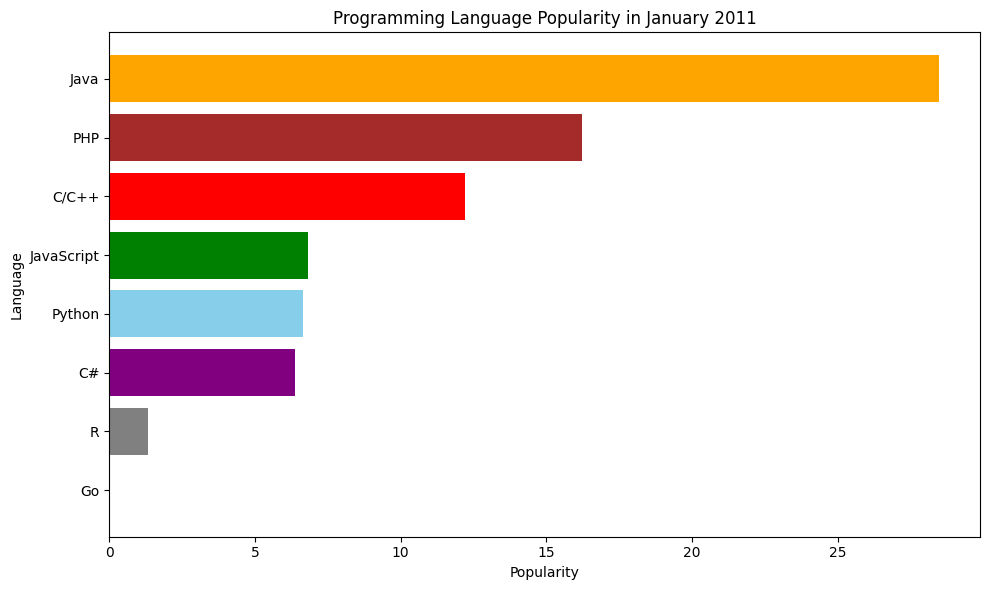

In [7]:
# Plotting the bar chart

# initialize the figure
plt.subplots(figsize=(10, 6))
# Create a horizontal bar chart
plt.barh(languages, popularity_scores, color=[colors[lang] for lang in languages])
plt.xlabel('Popularity')  
plt.ylabel('Language')  
plt.title('Programming Language Popularity in January 2011')
# Show the plot
plt.tight_layout()
plt.show()

In [8]:
# function to create multiple frames
def create_frame(frame):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Clear the current axis
    ax.clear()
    
    # Extract the data for the current frame
    date = df.iloc[frame]['Date']
    data = df.iloc[frame].drop('Date')
    new_date = pd.to_datetime(date).strftime('%B %Y')
    
    # Sorting data by popularity
    data_sorted = data.sort_values(ascending=True)
    
    # Identify the most popular language
    most_popular_language = data_sorted.index[0]
    
    # preparing the data for plotting
    # remaining_languages = data_sorted.index[1:]
    languages = data_sorted.index.tolist()
    popularity = data_sorted.values
    
    ax.barh(languages, popularity, color=[colors[lang] for lang in languages])
    
    ax.set_title(f'Programming Language Popularity ({new_date})')
    ax.set_xlabel('Popularity')
    ax.set_ylabel('Language')
    
    # adjusting x-axis limit
    ax.set_xlim(0, popularity[0] + 30)
    
    # creating a frame from the plot
    fig.canvas.draw()
    frame_data = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    frame_data = frame_data.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    plt.close(fig)  # Close the figure to avoid display
    
    return frame_data

# Generate frames for the animation
frames = [create_frame(frame) for frame in range(len(df))]

# Save the animation
imageio.mimsave('language_race.gif', frames, fps=8)
